In [1]:
import pandas as pd
import os
import os.path
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy 
from scipy.signal import find_peaks
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from AllPackage.PreProcessing import *

In [2]:
# leggo i file contunuti nella cartella Campioni_S_11x11 e acquisisco i nomi dei file
pathCampioni = '../Campioni _S_11x11/'
namefiles = [f for f in os.listdir(pathCampioni) if os.path.isfile(os.path.join(pathCampioni, f))]
namefiles

['S2_bkg_mapA_11x11.txt',
 'S1_mapA_11x11.txt',
 'S2_mapA_11x11.txt',
 'S1_bkg_mapA_11x11.txt']

In [3]:
# creo la variabile contenente i nomi delle colonne del pandas dataframe

columns = ['WaveNum']+[f'row{k}_point{i}' for k in range(1,12) for i in range(1,12)]


In [4]:
# creo i pandas dataframe dai file contenuti nella cartella Campioni_S_11x11

#for name in namefiles:
#    globals()['dataset_%s' % name[:-4]] = pd.read_csv('./Campioni _S_11x11/'+namefiles[0], delim_whitespace=True,names = columns)
    
data_S1_bkg = pd.read_csv(pathCampioni+namefiles[0], delim_whitespace=True,names = columns)
data_S1 = pd.read_csv(pathCampioni+namefiles[1], delim_whitespace=True,names = columns)
data_S2_bkg = pd.read_csv(pathCampioni+namefiles[2], delim_whitespace=True,names = columns)
data_S2 = pd.read_csv(pathCampioni+namefiles[3], delim_whitespace=True,names = columns)



In [5]:
#proviamo a fare un po' di preprocessing

S1_bkg_smooth = smooth_filter_savgol(data_S1_bkg,data_S1_bkg.columns)
#plot_spettri_pdf(S1_bkg_smooth,S1_bkg_smooth.columns,'./smooth_pdf/')
#plot_spettri_pdf(data_S1_bkg,data_S1_bkg.columns,'./pdf/')
[peaks_wn, peaks_int] = trova_picchi(data_S1_bkg,data_S1_bkg.columns)
#il trovapicchi sembra essere indip. da l'uso dello smooth
S1_bkg_smooth = norm_max_min(S1_bkg_smooth,S1_bkg_smooth.columns)
#prova di trasposizione
S1_bkg_trasp = transpose_df(S1_bkg_smooth)

Text(0.5, 0, 'Raman shift (cm$^{-1}$)')

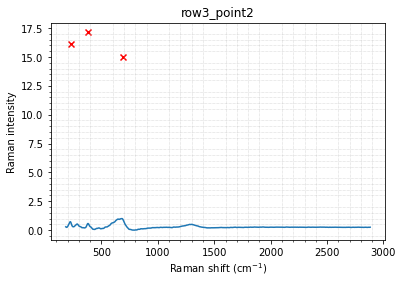

In [6]:
 fig = plt.figure();
    
ax = fig.add_subplot(1, 1, 1);
ax.plot(S1_bkg_smooth[S1_bkg_smooth.columns[0]],  S1_bkg_smooth[S1_bkg_smooth.columns[59]]);
ax.scatter(peaks_wn[59],peaks_int[59],color='r',marker='x')
ax.grid(which='minor', linestyle=':', linewidth=0.5);
ax.minorticks_on();

ax.set_title(S1_bkg_smooth.columns[24]);
ax.set_ylabel('Raman intensity')
ax.set_xlabel('Raman shift (cm$^{-1}$)')


In [7]:
pca = skl.decomposition.PCA(n_components=3)
StandardScaler = skl.preprocessing.StandardScaler()

In [8]:
StandardScaler.fit_transform(S1_bkg_trasp)
asd = pca.fit(S1_bkg_trasp)

In [16]:
wow = asd.transform(S1_bkg_trasp)
asd.explained_variance_ratio_

array([0.72267085, 0.08827358, 0.04147336])

In [ ]:
#esp (la distanza tra punti interni) è il parametro più influente con cui giocare

In [157]:
cluster = DBSCAN(eps=1.5, min_samples=5).fit_predict(wow)

In [158]:
cluster

array([ 0,  0, -1,  1, -1, -1,  0,  0,  0, -1,  0,  0,  1,  1,  0,  0,  0,
       -1,  0,  2, -1, -1,  1,  0,  1,  0, -1, -1,  0, -1, -1,  0,  1,  1,
       -1,  0,  3,  1,  3,  2,  3,  1, -1,  1,  1, -1,  3, -1, -1,  1,  1,
       -1,  0,  1,  1,  0,  0,  3,  1, -1,  3, -1, -1,  0,  1, -1, -1, -1,
        0, -1, -1,  1, -1,  2, -1, -1,  1, -1,  1, -1,  1, -1, -1,  2, -1,
        2, -1,  2,  1,  2, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  1,
        1,  0,  1,  0,  1, -1, -1, -1, -1, -1,  0,  1, -1, -1,  1, -1,  0,
       -1,  0])

In [159]:
color = []
for x in cluster:
    if(x==0):
        color.append('r')
    if(x==1):
        color.append('g')
    if(x==2):
        color.append('b')
    if(x==3):
        color.append('y')
    if(x==-1):
        color.append('k')

In [160]:
%matplotlib qt

fig = plt.figure();

X=wow[:,0]
Y=wow[:,1]
Z=wow[:,2]

ax = fig.add_subplot(111,projection='3d');
ax.scatter(X, Y, Z, c=color, marker='x')
ax.grid(which='minor', linestyle=':', linewidth=0.5);

ax.minorticks_on();

ax.set_title(S1_bkg_smooth.columns[24]);
ax.set_ylabel('PC1')
ax.set_xlabel('PC0')
ax.set_zlabel('PC2')



Text(0.5, 0, 'PC2')

array([[-1.01038991e+01,  9.49641308e-01, -1.43446604e+00],
       [-9.45400039e+00,  6.90416555e-01, -1.48624116e+00],
       [-4.48871039e+00,  6.00665102e-01, -1.52424960e+00],
       [-5.16293211e+00, -2.54601846e+00,  8.98390575e-01],
       [ 8.25215085e+00, -1.23174115e+00, -4.10118786e+00],
       [-5.74141267e+00, -1.54523403e+00,  1.14293914e+00],
       [-9.52240674e+00,  9.98475546e-01, -1.64705423e+00],
       [-8.91022346e+00,  9.83281836e-01, -2.04427936e+00],
       [-9.39619261e+00,  1.21473718e+00, -1.84260655e+00],
       [-3.81733397e+00, -8.79669606e-01, -3.16422258e-01],
       [-9.04277700e+00,  1.22087320e+00, -1.74179844e+00],
       [-1.14450476e+01,  1.55650997e+00, -1.78252361e+00],
       [-3.37497409e+00, -4.30917482e+00,  2.40481436e+00],
       [-3.85512561e+00, -3.73280133e+00,  1.59270858e+00],
       [-9.47983434e+00, -1.10355274e-01, -2.66933678e-01],
       [-1.16192509e+01,  1.65870883e+00, -1.76180902e+00],
       [-9.72819336e+00,  1.39207572e+00